<a href="https://colab.research.google.com/github/JulianRC12/Practicas/blob/main/Proyecto_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='navy'>**APLICACIONES DE PROCESAMIENTO DE IMÁGENES MÉDICAS** </font>

## <font color='purple'>**SEGMENTACIÓN DE IMÁGENES CON INTELIGENCIA ARTIFICIAL**</font>

### <font color='darkviolet'> **REPASO de Teoría y Fundamentos**
### <font color='orange'> **SLIC (Superpíxeles), Búsqueda de Contornos, Detector de borde (Canny)**
![Superpixeles](https://github.com/jambdeep/ApoyoMaterias/blob/main/IMAGES/superpixeles.png?raw=true)

![Contornos](https://github.com/jambdeep/ApoyoMaterias/blob/main/IMAGES/contornos.png?raw=true)
![Canny](https://github.com/jambdeep/ApoyoMaterias/blob/main/IMAGES/canny.png?raw=true)




### <font color='darkviolet'> **Fundamentos INTELIGENCIA ARTIFICIAL**
### <font color='orange'> **DEEP LEARNING**
![IA](https://github.com/jambdeep/ApoyoMaterias/blob/main/IMAGES/IA01.jpg?raw=true)
![RNA-Básica](https://github.com/jambdeep/ApoyoMaterias/blob/main/IMAGES/IA02.jpg?raw=true)
![RNA-Robusta](https://github.com/jambdeep/ApoyoMaterias/blob/main/IMAGES/IA03.jpg?raw=true)
![DeepLearning](https://github.com/jambdeep/ApoyoMaterias/blob/main/IMAGES/IA04.jpg?raw=true)





### <font color='darkviolet'> **DEEP LEARNING (Aplicaciones que usan CONVOLUCIONES)**
### <font color='orange'> **RECONOCIMIENTO DE NÚMEROS BASE DE DATOS (MNIST)**
![MNIST](https://github.com/jambdeep/ApoyoMaterias/blob/main/IMAGES/MNIST-CONV2D.jpeg?raw=true)
[Créditos de imágenes e información de redes convolucionales: **Convolutional Neural Networks : Understand the Basics**](https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-understand-the-basics/)

### <font color='red'>**Demostración en línea**
[Créditos al autor: **An Interactive Node-Link Visualization of Convolutional Neural Networks
Adam W. Harley**](https://adamharley.com/nn_vis/cnn/2d.html)

### <font color='orange'> **RECONOCIMIENTO DE OBJETOS (IMAGINET)**
![IMAGE-CONV2D](https://github.com/jambdeep/ApoyoMaterias/blob/main/IMAGES/IMAGE-CONV2D.png?raw=true)
[Créditos de imágenes e información de redes convolucionales: **Convolutional Neural Networks : Understand the Basics**](https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-understand-the-basics/)

### <font color='red'>**Demostración local**
### <font color='red'>**====>Acceder a página web local====>**



### <font color='darkviolet'> **TRANSFERENCIA DE APRENDIZAJE**
### <font color='orange'> **MODELOS ESPECIALIZADOS EN DETECCIÓN SEGMENTACIÓN, CLASIFICACIÓN, ETC**

![TL01](https://github.com/jambdeep/ApoyoMaterias/blob/main/IMAGES/TL01.png?raw=true)

![TL02](https://github.com/jambdeep/ApoyoMaterias/blob/main/IMAGES/TL02.jpg?raw=true)

### <font color='red'>**DETECCIÓN DE LUCIÉRNAGAS**
### <font color='red'>====>Acceder a CUADERNO local====>

### <font color='darkviolet'> **TRANSFERENCIA DE APRENDIZAJE**
### <font color='orange'> **BASE DE DATOS (IMÁGENES DE RESONANCIA MAGNÉTICA MRI)**

![MRI](https://github.com/jambdeep/ApoyoMaterias/blob/main/IMAGES/MRI.png?raw=true)

[Brain MRI segmentation](https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation)

![Propuesta](https://www.researchgate.net/publication/340225334/figure/fig2/AS:960014822944773@1605896778155/Mechanism-of-transfer-learning-using-pre-trained-models_W640.jpg)


[Créditos al autor: **Deep convolutional neural networks with transfer learning for automated brain image classification**](https://www.researchgate.net/publication/340225334_Deep_convolutional_neural_networks_with_transfer_learning_for_automated_brain_image_classification/figures?lo=1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random
from google.colab import files #Librería para cargar ficheros directamente en Colab
%matplotlib inline

In [ ]:
# Descargar la base de datos del sitio de Kaggle y subir a su carpeta de drive
%cd /content/drive/MyDrive/DATASETBIO/Brain_MRI

/content/drive/MyDrive/DATASETBIO/Brain_MRI


In [ ]:
# Datos que contienen la ruta a Brain MRI y su máscara correspondiente
brain_df = pd.read_csv('data_mask.csv')

In [ ]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [ ]:
brain_df

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0
...,...,...,...,...
3924,TCGA_DU_6401_19831001,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...,0
3925,TCGA_DU_6401_19831001,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...,0
3926,TCGA_DU_6401_19831001,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...,TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...,0
3927,TCGA_DU_6401_19831001,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...,TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...,0


In [ ]:
brain_df.head(50)

,patient_id,image_path,mask_path,mask
0,TCGA_CS_5395_19981004,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif,TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...,0
1,TCGA_CS_5395_19981004,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif,TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...,0
2,TCGA_CS_5395_19981004,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...,0
3,TCGA_CS_5395_19981004,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif,TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...,0
4,TCGA_CS_5395_19981004,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif,TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...,0
5,TCGA_CS_5395_19981004,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1.tif,TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_1_...,0
6,TCGA_CS_5395_19981004,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1.tif,TCGA_CS_4942_19970222/TCGA_CS_4942_19970222_1_...,0
7,TCGA_CS_5395_19981004,TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1.tif,TCGA_CS_5397_20010315/TCGA_CS_5397_20010315_1_...,0
8,TCGA_CS_5395_19981004,TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1.tif,TCGA_CS_6188_20010812/TCGA_CS_6188_20010812_1_...,0
9,TCGA_CS_5395_19981004,TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1.tif,TCGA_CS_6666_20011109/TCGA_CS_6666_20011109_1_...,0


In [ ]:
brain_df.image_path[1]  # Ruta a la imagen de la MRI

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif'

In [ ]:
brain_df.mask_path[1] # Ruta a la máscara de la MRI

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_mask.tif'

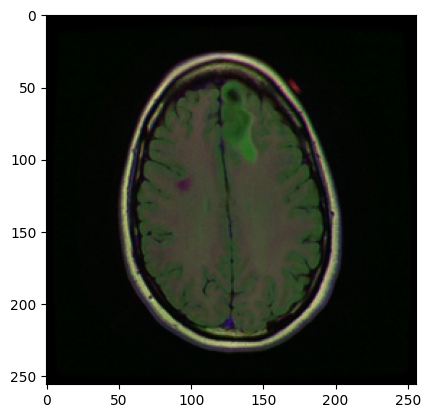

In [ ]:
img = io.imread(brain_df.image_path[2500])
plt.imshow(img, cmap='gray')

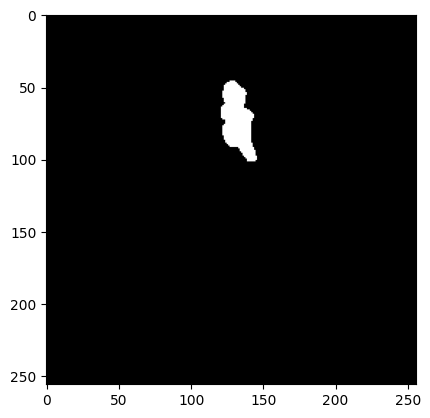

In [ ]:
mask = io.imread(brain_df.mask_path[2500])
plt.imshow(mask,cmap='gray')

In [ ]:
# si existe solamente valores de cero en toda la mascara, significa que ______________
mask.min()

0

In [ ]:
# si existe el valor 255 significa que ____________
mask.max() 

255

In [ ]:
# Indica en que posición la máscara es igual a 255
mask == 255

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

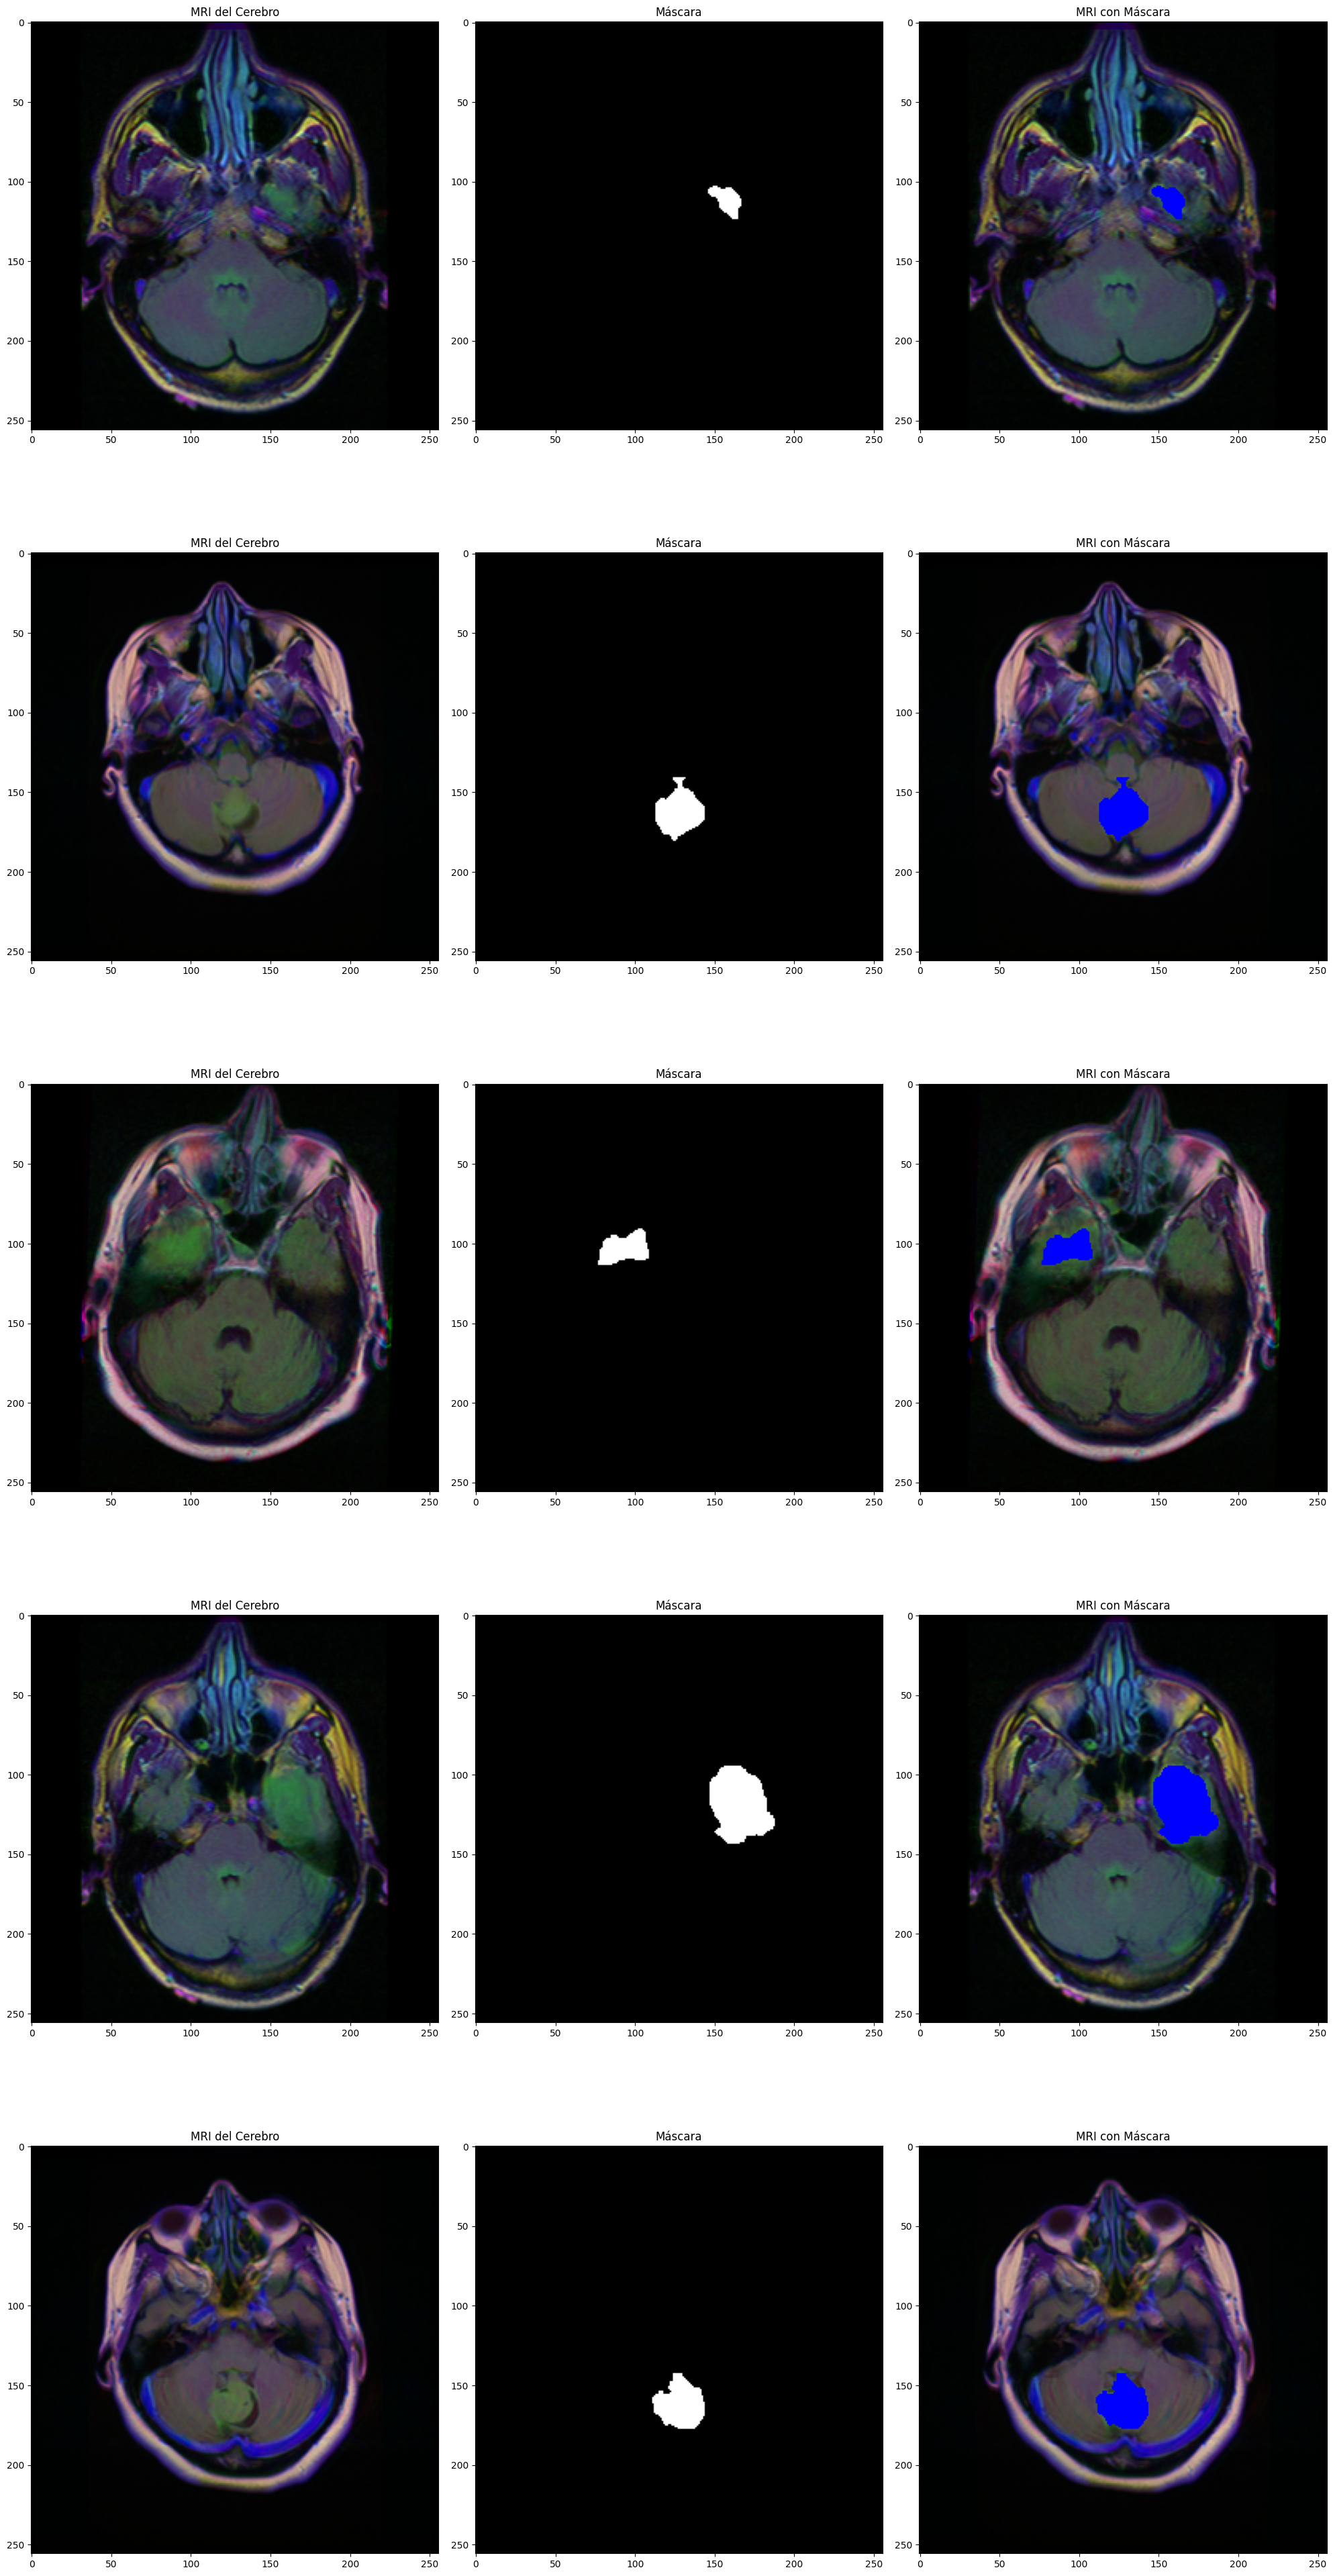

In [ ]:
contador = 0
fig, axs = plt.subplots(5, 3, figsize = (20, 40))
for i in range(len(brain_df)): 
  if brain_df['mask'][i] == 1 and contador <5:
    img = io.imread(brain_df.image_path[i])
    axs[contador][0].title.set_text('MRI del Cerebro')
    axs[contador][0].imshow(img)

    mask = io.imread(brain_df.mask_path[i])
    axs[contador][1].title.set_text('Máscara')
    axs[contador][1].imshow(mask, cmap = 'gray')
    
    img[mask == 255] = (0, 0, 255)
    axs[contador][2].title.set_text('MRI con Máscara')
    axs[contador][2].imshow(img)
    contador+=1

fig.tight_layout()

[Repositorio GitHub segmetación de imágenes médicas](https://github.com/rezazad68/BCDU-Net)